# 第4章: 言語解析

問題30から問題35までは、以下の文章`text`（太宰治の『走れメロス』の冒頭部分）に対して、言語解析を実施せよ。問題36から問題39までは、国家を説明した文書群（日本語版ウィキペディア記事から抽出したテキスト群）をコーパスとして、言語解析を実施せよ。

In [ ]:
text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

## 30. 動詞
文章`text`に含まれる動詞をすべて表示せよ。

In [1]:
%pip install janome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 52.8 MB/s eta 0:00:00


In [3]:
from janome.tokenizer import Tokenizer

text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

t = Tokenizer()
verbs = []
for token in t.tokenize(text):
  if token.part_of_speech.split(',')[0] == '動詞':
    verbs.append(token.surface)

print("文章中の動詞:")
for verb in verbs:
  print(verb)

文章中の動詞:
し
除か
なら
し
わから
吹き
遊ん
暮し
来


## 31. 動詞の原型
文章`text`に含まれる動詞と、その原型をすべて表示せよ。

In [4]:
from janome.tokenizer import Tokenizer

text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

t = Tokenizer()
verbs_with_base = []
for token in t.tokenize(text):
  if token.part_of_speech.split(',')[0] == '動詞':
    verbs_with_base.append((token.surface, token.base_form))

print("文章中の動詞とその原型:")
for verb, base_form in verbs_with_base:
  print(f"{verb} (原型: {base_form})")

文章中の動詞とその原型:
し (原型: する)
除か (原型: 除く)
なら (原型: なる)
し (原型: する)
わから (原型: わかる)
吹き (原型: 吹く)
遊ん (原型: 遊ぶ)
暮し (原型: 暮す)
来 (原型: 来る)


## 32. 「AのB」
文章`text`において、2つの名詞が「の」で連結されている名詞句をすべて抽出せよ。

In [5]:
from janome.tokenizer import Tokenizer

text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

t = Tokenizer()
tokens = list(t.tokenize(text))
noun_phrases = []

for i in range(len(tokens) - 2):
    if (tokens[i].part_of_speech.split(',')[0] == '名詞' and
        tokens[i+1].surface == 'の' and
        tokens[i+2].part_of_speech.split(',')[0] == '名詞'):
        noun_phrases.append(tokens[i].surface + tokens[i+1].surface + tokens[i+2].surface)

print("「A の B」の形式で連結されている名詞句:")
for phrase in noun_phrases:
    print(phrase)

「A の B」の形式で連結されている名詞句:
暴虐の王
村の牧人


## 33. 係り受け解析

文章`text`に係り受け解析を適用し、係り元と係り先のトークン（形態素や文節などの単位）をタブ区切り形式ですべて抽出せよ。

In [9]:
import spacy
import ipadic

# Load the Japanese model
nlp = spacy.load("ja_core_news_sm")

text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

doc = nlp(text)

print("係り元\t係り先")
for sent in doc.sents:
    for token in sent:
        if token.head is not token:
            print(f"{token.text}\t{token.head.text}")

係り元	係り先

	

メロス	激怒
は	メロス
激怒	激怒
し	激怒
た	激怒
。	激怒

	。
必ず	決意
、	必ず
かの	除か
邪智	暴虐
暴虐	王
の	暴虐
王	除か
を	王
除か	決意
なけれ	除か
ば	なけれ
なら	なけれ
ぬ	なけれ
と	除か
決意	決意
し	決意
た	決意
。	決意

	。
メロス	わから
に	メロス
は	メロス
政治	わから
が	政治
わから	わから
ぬ	わから
。	わから

	。
メロス	牧人
は	メロス
、	メロス
村	牧人
の	村
牧人	牧人
で	牧人
ある	で
。	牧人

	。
笛	吹き
を	笛
吹き	暮し
、	吹き
羊	暮し
と	羊
遊ん	暮し
で	遊ん
暮し	暮し
て	暮し
来	暮し
た	暮し
。	暮し

	

けれど	けれど
も	も
邪悪	敏感
に	邪悪
対し	に
ては	に
、	邪悪
人	倍
一	倍
倍	敏感
に	倍
敏感	敏感
で	敏感
あっ	で
た	敏感
。	敏感

	



## 34. 主述の関係
文章`text`において、「メロス」が主語であるときの述語を抽出せよ。

In [8]:
import spacy
import ipadic

# Load the Japanese model
nlp = spacy.load("ja_core_news_sm")

text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

doc = nlp(text)

print("「メロス」が主語であるときの述語:")
for sent in doc.sents:
    for token in sent:
        if token.text == "メロス" and "nsubj" in [child.dep_ for child in token.children]:
            print(token.head.text)

「メロス」が主語であるときの述語:


In [6]:
%pip install spacy ipadic
!python -m spacy download ja_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 74.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556704 sha256=fde7348fab347b4d4b5a4aa671a9228c49395de71520b86d91ced2563634a58c
  Stored in directory: /root/.cache/pip/wheels/93/8b/55/dd5978a069678c372520847cf84ba2ec539cb41917c00a2206
Successfully built ipadic
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ja_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
import spacy
import ipadic

# Load the Japanese model
nlp = spacy.load("ja_core_news_sm")

text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

doc = nlp(text)

print("係り元\t係り先")
for sent in doc.sents:
    for token in sent:
        if token.head is not token:
            print(f"{token.text}\t{token.head.text}")

係り元	係り先

	

メロス	激怒
は	メロス
激怒	激怒
し	激怒
た	激怒
。	激怒

	。
必ず	決意
、	必ず
かの	除か
邪智	暴虐
暴虐	王
の	暴虐
王	除か
を	王
除か	決意
なけれ	除か
ば	なけれ
なら	なけれ
ぬ	なけれ
と	除か
決意	決意
し	決意
た	決意
。	決意

	。
メロス	わから
に	メロス
は	メロス
政治	わから
が	政治
わから	わから
ぬ	わから
。	わから

	。
メロス	牧人
は	メロス
、	メロス
村	牧人
の	村
牧人	牧人
で	牧人
ある	で
。	牧人

	。
笛	吹き
を	笛
吹き	暮し
、	吹き
羊	暮し
と	羊
遊ん	暮し
で	遊ん
暮し	暮し
て	暮し
来	暮し
た	暮し
。	暮し

	

けれど	けれど
も	も
邪悪	敏感
に	邪悪
対し	に
ては	に
、	邪悪
人	倍
一	倍
倍	敏感
に	倍
敏感	敏感
で	敏感
あっ	で
た	敏感
。	敏感

	



## 35. 係り受け木
「メロスは激怒した。」の係り受け木を可視化せよ。

In [10]:
import spacy
from spacy import displacy
import ipadic

# Load the Japanese model
nlp = spacy.load("ja_core_news_sm")

sentence_to_visualize = "メロスは激怒した。"
doc = nlp(sentence_to_visualize)

print(f"'{sentence_to_visualize}' の係り受け木:")
displacy.render(doc, style="dep", jupyter=True)

'メロスは激怒した。' の係り受け木:


## 36. 単語の出現頻度

問題36から39までは、Wikipediaの記事を以下のフォーマットで書き出したファイル[jawiki-country.json.gz](/data/jawiki-country.json.gz)をコーパスと見なし、統計的な分析を行う。

* 1行に1記事の情報がJSON形式で格納される
* 各行には記事名が"title"キーに、記事本文が"text"キーの辞書オブジェクトに格納され、そのオブジェクトがJSON形式で書き出される
* ファイル全体はgzipで圧縮される

まず、第3章の処理内容を参考に、Wikipedia記事からマークアップを除去し、各記事のテキストを抽出せよ。そして、コーパスにおける単語（形態素）の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [2]:
import gzip
import json
import re
from collections import Counter
from janome.tokenizer import Tokenizer

file_path = '/datalab/jawiki-country.json.gz'
texts = []

# Load and extract text from the gzipped JSON file
with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for line in f:
        article = json.loads(line)
        text = article['text']

        # Basic markup removal (can be enhanced later)
        text = re.sub(r'\[\[.*?\]\]', '', text) # Remove internal links
        text = re.sub(r'\{\{.*?\}\}', '', text) # Remove templates
        text = re.sub(r'</?.*?>', '', text) # Remove HTML tags
        text = re.sub(r'\[.*?\]', '', text) # Remove external links
        text = re.sub(r'\|.*', '', text) # Remove table formatting (simple)
        text = re.sub(r'\*', '', text) # Remove list markers

        texts.append(text)

# Tokenize and count word frequencies
t = Tokenizer()
all_tokens = []
for text in texts:
    for token in t.tokenize(text):
        all_tokens.append(token.surface)

word_counts = Counter(all_tokens)

# Display the top 20 most frequent words
print("出現頻度の高い 20 語とその出現頻度:")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

出現頻度の高い 20 語とその出現頻度:
、: 82936
の: 81684
。: 51163
は: 49900
に: 48129
 : 46884
が: 43031
を: 37356
た: 34496
で: 32263
と: 26615
て: 25395
し: 24820


: 18251
年: 16162
）: 15713
（: 15404
れ: 13661
いる: 13268
さ: 12384


## 37. 名詞の出現頻度
コーパスにおける名詞の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [3]:
from collections import Counter
from janome.tokenizer import Tokenizer

# Assuming 'texts' variable is available from the previous cell (Problem 36)
# If not, you might need to re-run the previous cell or load the data again.

t = Tokenizer()
noun_tokens = []
for text in texts:
    for token in t.tokenize(text):
        # Check if the part of speech starts with '名詞' (Noun)
        if token.part_of_speech.split(',')[0] == '名詞':
            noun_tokens.append(token.surface)

noun_counts = Counter(noun_tokens)

print("出現頻度の高い 20 語とその出現頻度 (名詞):")
for word, count in noun_counts.most_common(20):
    print(f"{word}: {count}")

出現頻度の高い 20 語とその出現頻度 (名詞):
年: 16162
===: 9709
月: 7202
.: 7087
==: 6927
人: 6698
-: 6137
の: 5959
的: 4831
こと: 4519
日: 4462
国: 4423
1: 4364
2: 3690
,: 3347
ため: 3337
3: 3081
世界: 2898
政府: 2889
日本: 2794


## 38. TF・IDF
日本に関する記事における名詞のTF・IDFスコアを求め、TF・IDFスコア上位20語とそのTF, IDF, TF・IDFを表示せよ。

In [5]:
import math
from collections import Counter
from janome.tokenizer import Tokenizer

# Assuming 'texts' and 'noun_counts' are available from previous cells
# If not, you might need to re-run previous cells or load/process the data again.

# Find the article about Japan
japan_text = ""
with gzip.open('/datalab/jawiki-country.json.gz', 'rt', encoding='utf-8') as f:
    for line in f:
        article = json.loads(line)
        if article['title'] == '日本':
            japan_text = article['text']
            # Basic markup removal (same as in Problem 36)
            japan_text = re.sub(r'\[\[.*?\]\]', '', japan_text)
            japan_text = re.sub(r'\{\{.*?\}\}', '', japan_text)
            japan_text = re.sub(r'</?.*?>', '', japan_text)
            japan_text = re.sub(r'\[.*?\]', '', japan_text)
            japan_text = re.sub(r'\|.*', '', japan_text)
            japan_text = re.sub(r'\*', '', japan_text)
            break # Stop once the Japan article is found

if not japan_text:
    print("日本に関する記事が見つかりませんでした。")
else:
    # Tokenize nouns in the Japan article and calculate Term Frequency (TF)
    t = Tokenizer()
    japan_noun_tokens = []
    for token in t.tokenize(japan_text):
        if token.part_of_speech.split(',')[0] == '名詞':
            japan_noun_tokens.append(token.surface)

    japan_noun_counts = Counter(japan_noun_tokens)
    total_nouns_in_japan = len(japan_noun_tokens)

    # Calculate Inverse Document Frequency (IDF) for nouns
    # We need the total number of documents (articles) for IDF.
    # Assuming 'texts' from Problem 36 contains all article texts.
    total_documents = len(texts)
    idf_scores = {}
    for word, count in noun_counts.items():
        # Add 1 to the denominator to avoid division by zero for unseen words
        idf_scores[word] = math.log(total_documents / (count + 1))


    # Calculate TF-IDF for nouns in the Japan article
    tfidf_scores = {}
    for word, tf in japan_noun_counts.items():
        if word in idf_scores:
            # TF = count of word in document / total words in document
            tf_normalized = tf / total_nouns_in_japan
            tfidf_scores[word] = tf_normalized * idf_scores[word]

    # Display the top 20 nouns by TF-IDF
    print("日本に関する記事における名詞のTF・IDFスコア上位 20 語:")
    sorted_tfidf = sorted(tfidf_scores.items(), key=lambda item: item[1], reverse=True)

    for word, tfidf in sorted_tfidf[:20]:
        # Recalculate TF and get IDF for display
        tf = japan_noun_counts[word]
        tf_normalized = tf / total_nouns_in_japan
        idf = idf_scores[word]
        print(f"単語: {word}, TF: {tf_normalized:.6f}, IDF: {idf:.6f}, TF-IDF: {tfidf:.6f}")

日本に関する記事における名詞のTF・IDFスコア上位 20 語:
単語: .'''''', TF: 0.001402, IDF: 1.958081, TF-IDF: 0.002745
単語: 倭国, TF: 0.001361, IDF: 1.987068, TF-IDF: 0.002704
単語: 琉球, TF: 0.001237, IDF: 2.047693, TF-IDF: 0.002533
単語: 沖縄, TF: 0.001320, IDF: 1.902511, TF-IDF: 0.002510
単語: 天皇, TF: 0.001979, IDF: 1.264934, TF-IDF: 0.002504
単語: ::, TF: 0.001526, IDF: 1.621608, TF-IDF: 0.002474
単語: 倭, TF: 0.001072, IDF: 2.146133, TF-IDF: 0.002301
単語: 列島, TF: 0.001278, IDF: 1.799857, TF-IDF: 0.002301
単語: 唐, TF: 0.001031, IDF: 2.112231, TF-IDF: 0.002177
単語: 明治, TF: 0.001402, IDF: 1.506096, TF-IDF: 0.002112
単語: 日本書紀, TF: 0.000783, IDF: 2.517696, TF-IDF: 0.001973
単語: E, TF: 0.002392, IDF: 0.812948, TF-IDF: 0.001944
単語: 北海道, TF: 0.000948, IDF: 1.987068, TF-IDF: 0.001885
単語: 北陸, TF: 0.000660, IDF: 2.680215, TF-IDF: 0.001768
単語: 南西諸島, TF: 0.000619, IDF: 2.740840, TF-IDF: 0.001695
単語: 奄美, TF: 0.000660, IDF: 2.568990, TF-IDF: 0.001695
単語: 東アジア, TF: 0.000825, IDF: 2.047693, TF-IDF: 0.001689
単語: 樺太, TF: 0.000660, IDF: 2.517696, TF-

## 39. Zipfの法則
コーパスにおける単語の出現頻度順位を横軸、その出現頻度を縦軸として、両対数グラフをプロットせよ。

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29694 (\N{CJK UNIFIED IDEOGRAPH-73FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

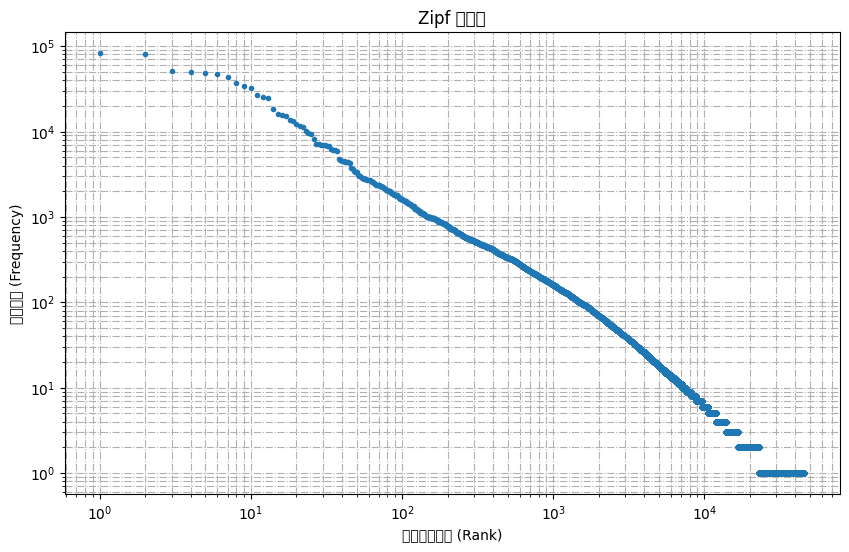

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'word_counts' is available from the previous cell (Problem 36)
# If not, you might need to re-run the previous cell or calculate word_counts again.

# Get frequencies and sort them in descending order
frequencies = sorted(word_counts.values(), reverse=True)

# Get the ranks (1-based)
ranks = np.arange(1, len(frequencies) + 1)

# Plot on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.', linestyle='None')
plt.xlabel("出現頻度順位 (Rank)")
plt.ylabel("出現頻度 (Frequency)")
plt.title("Zipf の法則")
plt.grid(True, which="both", linestyle='-.')
plt.show()